In [1]:
import pandas as pd
import numpy  as np

import pickle
 
from pathlib import Path


import matplotlib.pyplot as plt


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified

data_folder = "D:/analyze_Pearson_residuals/"

data_subfolder = "lupus"

data_path = Path ( data_folder + data_subfolder )


import sys
sys.path.append( data_folder )

from  nru_DE import *
from  plot_tab_utilities import *

In [3]:
 # output plot
plot_jpg =  data_subfolder + "_Figure_1.jpg"

# input data
counts_pkl = "counts_sparse.pkl" # sparse pandas data frame: cells in columns; genes in rows
nru_dict_pkl =  "nru_dict.pkl"



# path: output plot
plot_dsn = data_path / plot_jpg

# paths: input data
counts_dsn = data_path / counts_pkl
nru_dict_dsn = data_path / nru_dict_pkl   

In [4]:
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]		
		

bins_nz = [ 0, 10, 50, 100, 1000, 10000, 1e6]
labels_nz = ['1-10', '11-50', '51-100', '101-1,000', '1,001-10,000','10,001+']

bins_MSSQ_PR = [  0, 1, 2 , 1e6]
labels_MSSQ_PR = [ '<=1', '1<-2', '>2']

In [5]:
#### compute mean SSQ of Pearson residuals for ALL genes with nonzero counts

df_counts_sparse = pd.read_pickle ( counts_dsn )
print ( ' df_counts_sparse:' )
print ( df_counts_sparse )
print ( '\n type( df_counts_sparse ) ', type ( df_counts_sparse ))
print ( '\n df_counts_sparse.sparse.density: ', df_counts_sparse.sparse.density)

 df_counts_sparse:
barcode          AAACATACAATGCC-1  AAACATACATTTCC-1  ...  TTTGCATGGTTTGG-1  \
ENSEMBL_ID                                           ...                     
ENSG00000239945                 0                 0  ...                 0   
ENSG00000237683                 0                 0  ...                 0   
ENSG00000228463                 0                 0  ...                 0   
ENSG00000228327                 0                 0  ...                 0   
ENSG00000237491                 0                 0  ...                 0   
...                           ...               ...  ...               ...   
ENSG00000160298                 0                 0  ...                 0   
ENSG00000160299                 0                 0  ...                 0   
ENSG00000160305                 0                 0  ...                 0   
ENSG00000160307                 0                 0  ...                 0   
ENSG00000160310                 0            

In [6]:
#### sparse matrix input to function mean_SSQ_Pearson_residuals
 
counts_scipy_csr_mat = df_counts_sparse.sparse.to_coo().tocsr()
print ( ' counts_scipy_csr_mat:' )
print ( counts_scipy_csr_mat )

 counts_scipy_csr_mat:
  (0, 925)	1
  (1, 2903)	1
  (1, 5043)	1
  (1, 9436)	1
  (1, 10254)	1
  (1, 19868)	1
  (1, 21618)	1
  (2, 24139)	1
  (3, 9067)	1
  (3, 10151)	1
  (3, 10284)	1
  (3, 12397)	1
  (3, 13793)	1
  (3, 16837)	1
  (4, 2975)	1
  (4, 3537)	1
  (4, 7704)	1
  (4, 8939)	1
  (4, 11157)	1
  (4, 11485)	1
  (4, 16388)	1
  (4, 19905)	1
  (4, 19987)	1
  (4, 21058)	1
  (4, 24346)	1
  :	:
  (18500, 26701)	3
  (18500, 26706)	1
  (18500, 26712)	1
  (18500, 26713)	1
  (18500, 26720)	1
  (18500, 26721)	1
  (18500, 26722)	1
  (18500, 26732)	1
  (18500, 26734)	1
  (18500, 26744)	2
  (18500, 26745)	1
  (18500, 26752)	1
  (18500, 26766)	1
  (18500, 26769)	1
  (18500, 26773)	2
  (18500, 26774)	1
  (18500, 26778)	2
  (18500, 26783)	1
  (18500, 26789)	1
  (18500, 26792)	1
  (18500, 26797)	2
  (18500, 26802)	1
  (18500, 26803)	1
  (18500, 26813)	1
  (18500, 26814)	1


In [7]:
df_all_nz_genes = df_counts_sparse.sum ( axis=1 ).to_frame ( name='count' )
counts_GT_0 = ( counts_scipy_csr_mat > 0 ).astype( int )  
df_all_nz_genes['nz_cells'] = np.ravel ( counts_GT_0.sum ( axis=1 ) )

gene_list = df_all_nz_genes.index.values.tolist()
df_all_nz_genes['M_g'] = mean_SSQ_Pearson_residuals ( counts_scipy_csr_mat, gene_list, 1000 )

print ( '\n\n df_all_nz_genes'  )
print ( df_all_nz_genes  )

print ( '\n\n df_all_nz_genes.describe' )
print ( df_all_nz_genes.describe ( percentiles=pctl_list ) )



 df_all_nz_genes
                 count  nz_cells       M_g
ENSEMBL_ID                                
ENSG00000239945      1         1  1.335636
ENSG00000237683      6         6  1.156232
ENSG00000228463      1         1  1.187697
ENSG00000228327      6         6  1.292381
ENSG00000237491     11        11  0.984649
...                ...       ...       ...
ENSG00000160298     39        39  1.175782
ENSG00000160299    143       140  1.143676
ENSG00000160305    447       421  1.317724
ENSG00000160307    304       208  2.238572
ENSG00000160310   6004      4894  1.348849

[18501 rows x 3 columns]


 df_all_nz_genes.describe
              count      nz_cells           M_g
count  1.850100e+04  18501.000000  18501.000000
mean   2.176357e+03    822.537052      1.404025
std    3.244575e+04   2362.001021      7.000995
min    1.000000e+00      1.000000      0.279951
1%     1.000000e+00      1.000000      0.483316
5%     1.000000e+00      1.000000      0.699184
10%    2.000000e+00      2.00000

In [8]:
df_all_nz_genes['nonzero cells'] = pd.cut ( df_all_nz_genes['nz_cells'], bins_nz, labels=labels_nz )
df_all_nz_genes['M_g_category'] = pd.cut ( df_all_nz_genes['M_g'], bins_MSSQ_PR, labels=labels_MSSQ_PR )
pt_nz_vs_Mg = pv_table_noprint_margins ( df_all_nz_genes, 'nonzero cells', 'M_g_category' )

print ( '\n\n Table \n relation between # nonzero_cells  and  mean SSQ of Pearson residuals \n' )
print ( pt_nz_vs_Mg )



 Table 
 relation between # nonzero_cells  and  mean SSQ of Pearson residuals 

M_g_category    <=1   1<-2   >2  Total
nonzero cells                         
1-10           2027   3009  232   5268
11-50           563   1995   89   2647
51-100          212   1085   55   1352
101-1,000       640   5233  119   5992
1,001-10,000     75   2788  147   3010
10,001+           0    115  117    232
Total          3517  14225  759  18501


In [9]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_gene_stats = nru_dict['df_gene_stats'] [[ 'nz_cells', 'M_g', 'A_g']]

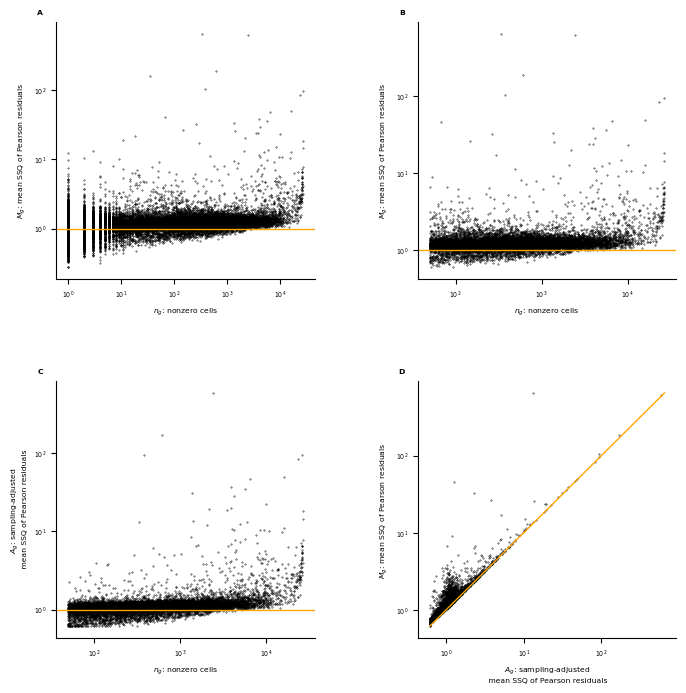

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=( 8, 8) )
  
plot_ax ( df_all_nz_genes, ax1, 'A', 'nz_cells', 'M_g', '$n_g$: nonzero cells',  '$M_g$: mean SSQ of Pearson residuals', line_slope='horizontal'  )  
plot_ax ( df_gene_stats, ax2, 'B', 'nz_cells', 'M_g', '$n_g$: nonzero cells',  '$M_g$: mean SSQ of Pearson residuals', line_slope='horizontal'  )
plot_ax ( df_gene_stats, ax3, 'C', 'nz_cells', 'A_g', '$n_g$: nonzero cells', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals', line_slope='horizontal'  )
plot_ax ( df_gene_stats, ax4, 'D', 'A_g', 'M_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals', '$M_g$: mean SSQ of Pearson residuals'  )

plt.subplots_adjust( wspace=0.4, hspace=0.4)

plt.savefig( plot_dsn, transparent=True, dpi=300 )